<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.info()
display(data.head())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [4]:
print('Дубликатов в данных:', data.duplicated().sum())

Дубликатов в данных: 153


Удаление дубликатов

In [5]:
data = data.drop_duplicates().reset_index(drop=True)

In [6]:
print(data.describe())

               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  4847.000000  4847.000000   4847.000000  4847.000000        4847.000000
mean      0.498453    31.023932  39895.811842     1.203425           0.152259
std       0.500049     8.487995   9972.953985     1.098664           0.468934
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    24.000000  33200.000000     0.000000           0.000000
50%       0.000000    30.000000  40200.000000     1.000000           0.000000
75%       1.000000    37.000000  46600.000000     2.000000           0.000000
max       1.000000    65.000000  79000.000000     6.000000           5.000000


In [7]:
print(data.shape)

(4847, 5)


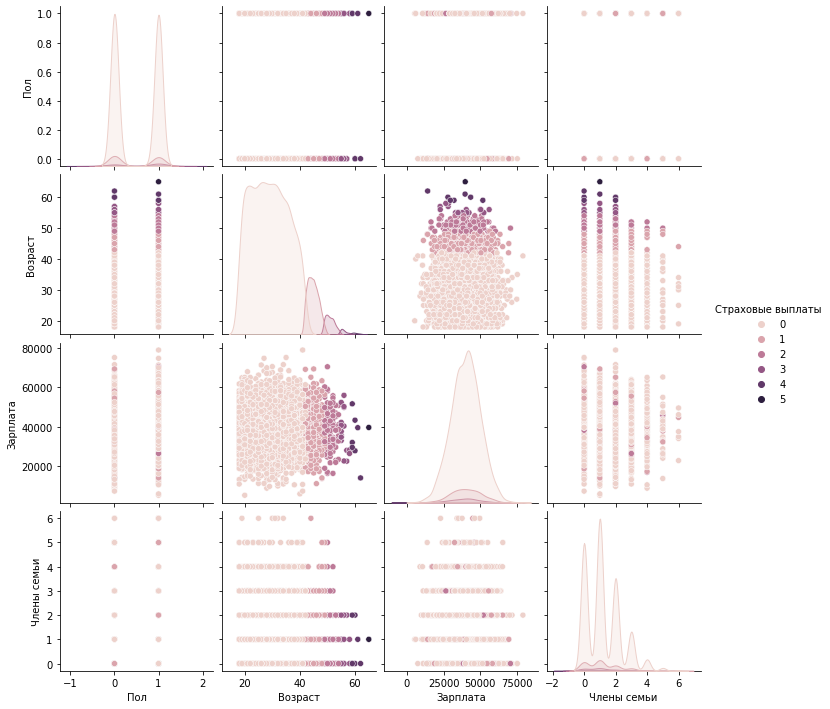

In [8]:
sns.pairplot(data, hue='Страховые выплаты')

Дубликаты в данных можно удалить, а можно было не удалять, так как у одних и тех же клиентов может быть несколько страховых продуктов в одной страховой компании. Однако, как видно из гистограмм, страховые выплаты за последние 5 лет были выплачены людям в возрасте: чем больше выплат, тем возраст старше. Поэтому предположу, что страховали в данном случае скорее всего здоровье, а в одной и той же компании несколько раз в год страховать здоровье - мне кажется странным. Поэтому мною было решено удалить дубликаты.

**Вывод**  

- В данных 4847 строк после удаления дубликатов.  
- Пол в данных распределен приблизительно равномерно.  
- Из графиков видно, что чем старше клиенты, тем больше страховых выплат.
- Названия признаков кириллицей и с большой буквы - можно исправить, но буду работать с существующими названиями.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (𝑋^𝑇 𝑋)^{−1}𝑋^𝑇𝑦
$$

**Вопрос**  

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:**  

Не изменится.

**Обоснование:**  

Умножим признаки на обратимую матрицу:  

$$
𝑤_1=((XP)^T X P)^{-1} (XP)^T y
$$  

Учитывая, что $ (A * B)^{-1} = B^{-1} * A^{-1}$ , то получается:  

$$
w_1=(P^T X^T X P)^{-1} P^T X^T y  
$$  

$$
w_1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$  

$$
w_1 = P^{-1} (X^T X)^{-1} E  X^T y
$$  

При умножении матрицы на обратную получается единичная матрица, при умножении любой матрицы на которую получается та же матрица. Потому матрицу и обратную можно "сократить". Матрицы А и B квадратные, P, P^T и X^T X квадратные.

$$
w_1=P^{-1} (X^T X)^{-1}  X^T y
$$  

При этом 
$$ a_1=X P w_1 $$  

$$a_1=X P P^{-1} (X^T X)^{-1}  X^T y$$  

$$a_1=X (X^T X)^{-1} X^T y$$  

$$a_1=X w$$

**Вывод**  

При умножении признаков на обратимую матрицу **P**  качество не меняется.

## Алгоритм преобразования

**Алгоритм**

Для шифрования данных нужно умножить признаки данных на матрицу шифрования. Для перемножения нужно сгенерировать обратимую матрицу размера 4х4 по количеству признаков, потому что при перемножении матриц количество столбцов исходной должно равняться количеству строк матрицы шифрования, которая должна быть квадратной.

**Обоснование**

Выделение из данных целевого признака.

In [9]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Создание матрицы нужной размерности

In [10]:
matrix_rand = np.random.random((features.shape[1], features.shape[1]))

Шифрование данных

In [11]:
features_rand = features @ matrix_rand
display(features_rand.head(5))

,0,1,2,3
0,24540.388294,24564.040350,39846.229283,33373.387810
1,18811.371575,18830.045801,30534.030667,25577.690614
2,10397.868633,10408.699321,16875.496618,14137.137115
3,20623.165401,20640.754888,33493.235607,28049.150605
4,12917.497857,12931.089943,20970.649467,17565.604519


Создается функция, на входе получает признаки, проверяется матрица на обратимость, а возвращается зашифрованная матрица.

In [12]:
def features_random(features):
    features_cr = features
    matrix_rand = np.random.random((features_cr.shape[1], features_cr.shape[1]))
    det_matrix = np.linalg.det(matrix_rand)
    while det_matrix == 0:
        matrix_rand = np.random.random((features_cr.shape[1], features_cr.shape[1]))
        det_matrix = np.linalg.det(matrix_rand)
    features_cr = features_cr @ matrix_rand
    return features_cr

**Вывод**  

Выделил признаки из данных и зашифровал их, создав раномную матрицу с помощью библиотеки NumPy.

## Проверка алгоритма

Обучение модели линейной регрессии и вычисление метрики R2 на оригинальных данных и на зашифрованных.

Оригинальные данные

In [13]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4302010044852066


Зашифрованные данные

In [14]:
features_rand = features_random(features)

In [15]:
model = LinearRegression()
model.fit(features_rand, target)
predictions = model.predict(features_rand)
print(r2_score(target, predictions))

0.4302010044854292


Качество метрики R2 незначительно различается, скорее всего из-за работы и перемножения с числами типа `float`.

**Вывод**  

При шифровании данных путем умножения матрицы признаков на обратимую матрицу качество моделей `не изменяется`.